## Load dataset 

In [1]:
#import Libraries and load dataset 
from pattern.en import parsetree
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os 

import re, string, unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
from normalization import tokenize_text
from normalization import normalize_corpus
from utils import build_feature_matrix

In [3]:
dataset = pd.read_csv('C:/Users/wenzhu/Desktop/327/final_project/Womens.csv')

In [4]:
dataset.head()

#rating vs freqeny - histgram (jOEY)
# class imbalance boostrapping (PUNITA)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
sumNullRws = dataset.isnull().sum()
sumNullRws

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:

dataset.info()


# ## Data preprocessing

# ###### 1. Dropping null value
# ###### 2. Converting into lower text,
# ###### 3. Removing stop words, punctuations
# ###### 4. Text Normalization : Tokenisation,Stemming, Lamentisation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
dataset.dropna(subset=['Review Text'], inplace=True)
dataset.dropna(subset=['Department Name'], inplace=True)#review all row without textual review 
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [8]:
dataset.shape

(22628, 11)

In [9]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
import matplotlib.pyplot as plt
plt.hist(dataset['Rating'])
plt.xlim(xmin=1, xmax = 5)
plt.xlabel('Rating')
plt.ylabel('Number of customers')
plt.title('Histogram for rating')
plt.show()

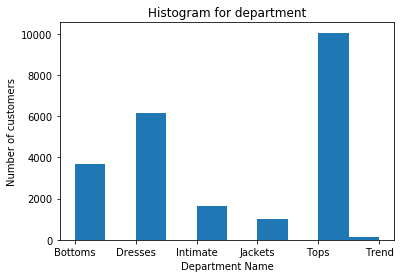

In [11]:
dataset.dropna(subset=['Department Name'], inplace=True)
import matplotlib.pyplot as plt
plt.hist(dataset['Department Name'])
plt.xlabel('Department Name')
plt.ylabel('Number of customers')
plt.title('Histogram for department')
plt.show()

## Data Overview

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wenzhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


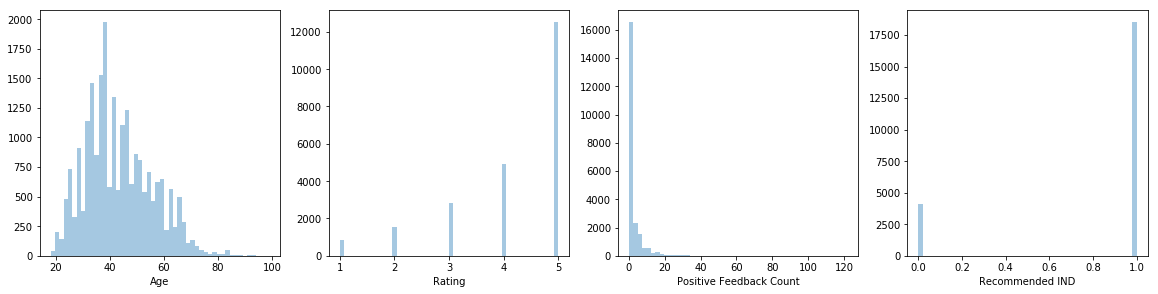

In [13]:
df = dataset[['Age','Rating','Positive Feedback Count','Recommended IND']]
df.head()
#histogram
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index], kde=0, norm_hist=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
def normalize_corpus(corpus, tokenize=False):
    
    normalized_corpus = []    
    for text in corpus:
        text = expand_contractions(text, CONTRACTION_MAP)
        text = [[word.lower() for word in df.split()] for df in text]
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        text = re.sub('[^A-Za-z]+', ' ', text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
            
    return normalized_corpus

from normalization import normalize_corpus

In [15]:
wordcloud=dataset["Review Text"]


In [16]:
all_words= normalize_corpus(wordcloud,tokenize=True,only_text_chars=True)

In [17]:
import itertools
ab=list(itertools.chain(all_words))

In [18]:
word_list=sum(ab, []) 

In [19]:
word_list = nltk.FreqDist(word_list)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

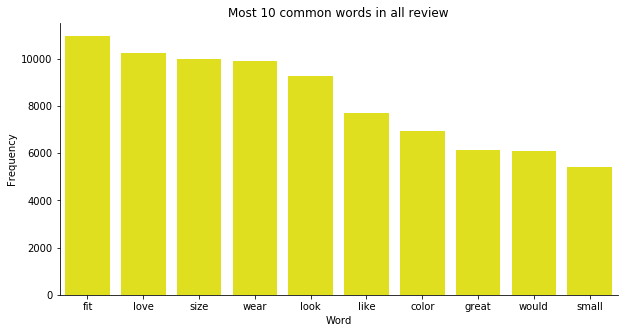

In [21]:
word_df = pd.DataFrame(word_list.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="yellow")
plt.title('Most 10 common words in all review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

In [22]:
wordcloudall=' '.join(map(str, all_words))

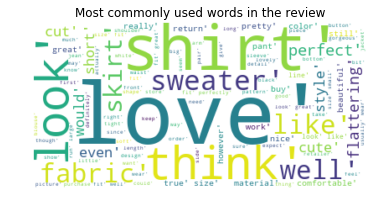

In [23]:


from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloudall)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most commonly used words in the review")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [24]:
#wordcloud for recommended
wordcloud1= dataset.loc[dataset["Recommended IND"]==1,"Review Text"] # recommended text
wordcloud1.head()


0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

In [25]:
all_words1 = normalize_corpus(wordcloud1,tokenize=True,only_text_chars=True) #normalized 

In [26]:
import itertools
ab=list(itertools.chain(all_words1))
word_list1=sum(ab, []) 
word_list1 = nltk.FreqDist(word_list1)

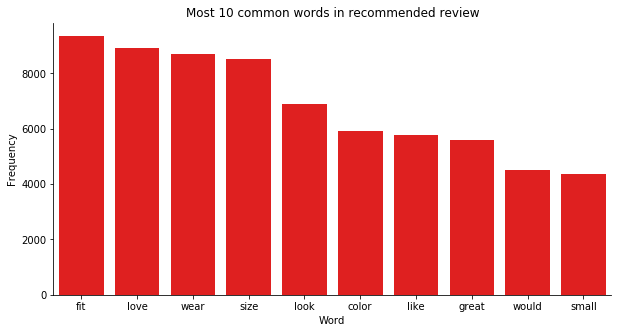

In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

word_df = pd.DataFrame(word_list1.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="red")
plt.title('Most 10 common words in recommended review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

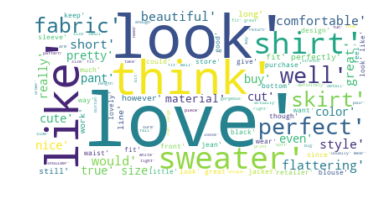

In [28]:
wordcloud11=' '.join(map(str, all_words1))

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloud11)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [29]:
#wordcloud for not recommended
wordcloud0= dataset.loc[dataset["Recommended IND"]==0,"Review Text"] # not recommended text
wordcloud0.head()

2     I had such high hopes for this dress and reall...
5     I love tracy reese dresses, but this one is no...
10    Dress runs small esp where the zipper area run...
22    First of all, this is not pullover styling. th...
25    Loved the material, but i didnt really look at...
Name: Review Text, dtype: object

In [30]:
all_words0 = normalize_corpus(wordcloud0,tokenize=True,only_text_chars=True) #normalized 

In [31]:
import itertools
ab=list(itertools.chain(all_words0))
word_list0=sum(ab, []) 
word_list0 = nltk.FreqDist(word_list0)

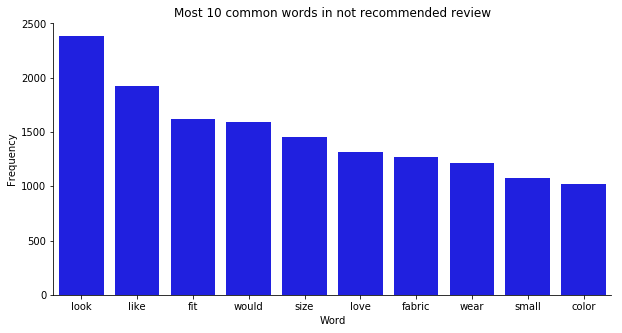

In [32]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

word_df = pd.DataFrame(word_list0.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10],color="blue")
plt.title('Most 10 common words in not recommended review')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

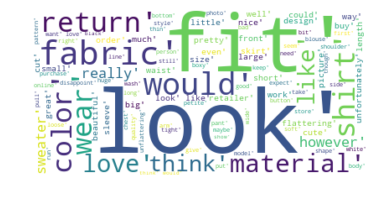

In [33]:
wordcloud00=' '.join(map(str, all_words0))

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(wordcloud00)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [34]:
X= dataset['Review Text']
y = dataset['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [35]:
X_train.head()

14544    Oh this is so much prettier in person! what yo...
10559    I purchased this dress in "yellow" in a size 8...
3578     Grabbed this off the sales rack-not expecting ...
8311     Love this sweater. it fits exactly as shown on...
13755    This top is absolutely beautiful. i especially...
Name: Review Text, dtype: object

In [36]:
all_words = normalize_corpus(X_train,tokenize=True,only_text_chars=True)

In [37]:
testcloud=' '.join(map(str, all_words))

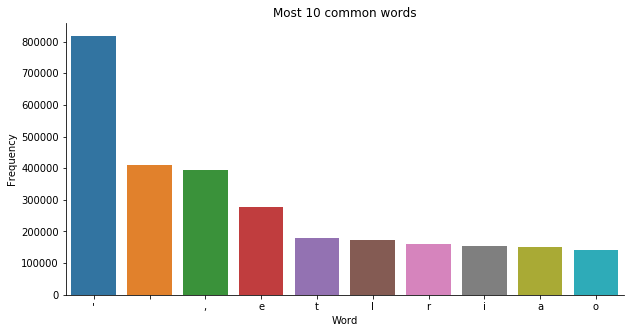

In [38]:
#JOY - REMOVE COLOR AND TAKE A LOOK AT THE CODE
word_list = nltk.FreqDist(testcloud)
word_df = pd.DataFrame(word_list.most_common(100), columns=['Word', 'Frequency'])

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Word', y = 'Frequency', data = word_df[:10])
plt.title('Most 10 common words')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

## Wordcloud of the Review Text overall

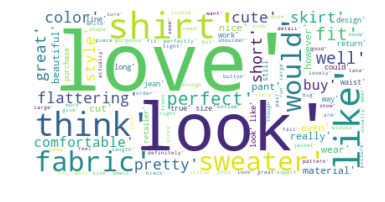

In [39]:
# DIVIDE DATA BY RECOMMED OR NOT / SETIMENT (JOEY/JOY)
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(testcloud)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Normalization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

## Extract features - method 1

In [41]:
# Extracting features from text files
# Remove the stop words
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
X_train_counts = stemmed_count_vect.fit_transform(X_train)
X_train_counts.shape

(15839, 8283)

In [42]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(15839, 8283)

In [43]:
print(X_train_tfidf[0:2])

  (0, 5068)	0.34487484092775417
  (0, 5640)	0.34225242204638956
  (0, 5393)	0.21242014718484736
  (0, 5428)	0.3292030777052599
  (0, 3053)	0.5493455616837218
  (0, 1127)	0.17440683396084566
  (0, 5791)	0.24068792199825423
  (0, 1579)	0.3949914499749414
  (0, 2964)	0.10491533766589689
  (0, 7519)	0.19961530196901223
  (0, 6552)	0.11587463189613638
  (1, 5393)	0.1335377349542183
  (1, 2964)	0.0659549328984753
  (1, 6552)	0.1456889667682864
  (1, 5745)	0.11654848488641087
  (1, 2495)	0.2281007019906575
  (1, 8234)	0.1923933311453545
  (1, 12)	0.15307030228986335
  (1, 4261)	0.1583607360184392
  (1, 2489)	0.22328533672822765
  (1, 4379)	0.06587396522684273
  (1, 4923)	0.2026300471188756
  (1, 4216)	0.11168548554093385
  (1, 3604)	0.14757236790501918
  (1, 4027)	0.08893019225369904
  (1, 4082)	0.15622235712897936
  (1, 5733)	0.16059384568242321
  (1, 6945)	0.26929160160469334
  (1, 6227)	0.19156915735566393
  (1, 7999)	0.21282228824403362
  (1, 3547)	0.1765971532073322
  (1, 4339)	0.1495396

## Modeling

In [44]:
#Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [45]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)

In [46]:
# Performance of NB Classifier
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.8341434673736927

In [47]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.8395934600088378

## Model tuning

In [ ]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}


In [ ]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=2) #problem here! #TRY 2  #JOY
gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
# To see the best mean score and the params, run the following code

print(gs_clf.best_score_)
print(gs_clf.best_params_)

# Output for above should be: The accuracy has now increased to ~90.3e% for the NB classifier (not so naive anymore! )
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

In [ ]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)

In [ ]:
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

## Sentiment Analysis 

In [ ]:
# Rating > 3: Positive
# Rating < 3: Negative

dataset['Sentiment'] = np.where(dataset['Rating']>3, 'Postitive', 'Negative')

In [ ]:
# X, Y , train and test split

X = np.array(dataset['Review Text'])
y = np.array(dataset['Sentiment'])


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
test_reviews = np.array(X_test)
test_sentiments = np.array(y_test)
norm_train_reviews = normalize_corpus(X_train,lemmatize=True,only_text_chars=True)
norm_test_reviews = normalize_corpus(X_test,lemmatize=True,only_text_chars=True)

In [ ]:
test_sentiments

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):  
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix


In [ ]:
#feature extraction
vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
                                                  feature_type='tfidf',
                                                  ngram_range=(1, 1), 
                                                  min_df=0.0, max_df=1.0) 

In [ ]:
from sklearn.linear_model import SGDClassifier
# build the model
svm = SGDClassifier(loss='hinge', n_iter=500)
svm.fit(train_features, y_train)

In [ ]:

test_features = vectorizer.transform(norm_test_reviews)   



#Predict Test reviews
predicted_sentiments = svm.predict(test_features)


# ### Evaluate the performance



from utils import display_evaluation_metrics, display_confusion_matrix, display_classification_report


display_evaluation_metrics(true_labels=test_sentiments,
                           predicted_labels=predicted_sentiments,
                           positive_class='Postitive')  
                           
display_confusion_matrix(true_labels=test_sentiments,
                         predicted_labels=predicted_sentiments,
                         classes=['Postitive', 'Negative'])
                         
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=predicted_sentiments,
                              classes=['Postitive', 'Negative'])  
